# Tankmodell - Vi fyller og tømmer tanken
__Creative Commons BY-SA : bitjungle (Rune Mathisen) og fuzzbin (Tom Jarle Christiansen)__

Tidligere har vi laget [en modell for en tank hvor det strømmer væske ut av et hull i bunnen av tanken](https://github.com/fagstoff/ProgMod/blob/master/Fagtekster/Notebooks/tankmodell1.ipynb). Nå skal vi utvide denne modellen sånn at den har en tilførsel av væske i toppen også. Se figuren nedenfor:

![Skisse av tanken](img/tank02.png)

Tanken har tverrsnitt $A_t=2 \ \mathrm{m}^2$ over hele høyden til tanken. I toppen av tanken kommer det inn væske $q_{inn} = 0.05 \ m^3/s$ (50 liter i sekundet). I bunnen av tanken er det et hull hvor innholdet i tanken renner ut. Arealet til dette hullet er $A_h=0,01 \ \mathrm{m}^2$. Ved tiden $t=0 \ \mathrm{s}$ er tanken fylt opp til høyden $h=4 \ \mathrm{m}$. Hvordan vil høyden $h$ endres over tid? Vil tanken tømmes helt? Vi antar at væsken er inkompresibel og at den strømmer friksjonsfritt ut av hullet i bunnen. Vi kan også sette $g=9.81 \ \mathrm{m/s}^2$.

La oss først definere de parametrene vi har fått oppgitt:

In [14]:
import math # vi trenger dette biblioteket senere

A_t = 2.00 # Tankens tverrsnittareal (m^2)
A_h = 0.01 # Hullets tverrsnittareal (m^2)
h = 4.00 # Vannivået når forsøket starter (m)
g = 9.81 # Gravitasjonskonstanten (m/s^2)
q_inn = 0.05 # Mengde vann inn i toppen av tanken (m^3/s)

Nå setter vi opp et uttrykk for hvordan volumet endrer seg over tid, når det kommer væske inn i toppen av tanken samtidig som det strømmer væske ut i bunnen av tanken. Da har vi at:

$$ \frac{dV}{dt} = q_{inn} - q_{ut}$$

Eller for å si det med ord: 
> Endringen til volumet av væsken i tanken er lik mengden væske som strømmer inn i tanken minus det som strømmer ut av tanken.

Mengden $q_{ut}$ som strømmer ut av tanken er gitt ved arealet $A_h$ til hullet og hastigheten $v_1$ på væskestrømmen ut av hullet: 

$$ q_{ut} = A_h \cdot v_1 $$

Siden tverrsnittet $A_t$ til tanken er konstant og volumet av væsken i tanken er gitt ved $V=A_t \cdot h$, kan vi nå skrive:

$$ A_t \frac{dh_0}{dt} = q_{inn} - A_h \cdot v_1 $$

I [tankmodell 1](https://github.com/fagstoff/ProgMod/blob/master/Fagtekster/Notebooks/tankmodell1.ipynb) fant vi at vi kunne uttrykke $v_1$ slik:

$$ v_1 = \sqrt{2gh} $$

Vi setter $\sqrt{2g} = k $, og får:
$$ v_1 = k \sqrt{h} $$

In [15]:
k = math.sqrt(2*g)
print("Konstanten k er {}".format(k))

Konstanten k er 4.4294469180700204


Nå kan vi sette inn uttrykket for $v$ i uttrykket for endring av volumet til væsken i tanken:

$$ A_t \frac{dh}{dt} = q_{inn} - A_h k \sqrt{h}$$

Uttrykket for endring av høyden over tid blir da:

$$ \frac{dh}{dt} = \frac{1}{A_t} \left( q_{inn} - A_h k \sqrt{h} \right) $$

Vi bruker Eulers metode for å finne ut hva høyden $h$ er ved tiden $i+1$:

$$ \frac{h_{i+1} - h_i}{t_{i+1} − t_i} = \frac{1}{A_t} \left( q_{inn} - A_h k \sqrt{h_i} \right) $$

$$ h_{i+1} = \frac{1}{A_t} \left( q_{inn} - A_h  k\sqrt{h_i} \right) (t_{i+1} - t_i) + h_i $$

Nå kan vi implementere Eulers metode i Python:

In [16]:
def euler(h, t, t_neste):
    '''Regner ut ny høyde i tanken vet tiden t_neste, gitt høyden ved tiden t. 
       Bruker globale variabler for areal av tank og hull i bunn av tanken.
    '''
    return 1/A_t * ((q_inn) - A_h * k * math.sqrt(h)) * (t_neste - t) + h

Vi starter ved tiden $t=0$ og endrer tiden med 5 sekunder for hver nye beregning ($\Delta t=5$).

t = 0 => h = 4.0 	 v = 8.86 	 q_inn = 0.05 	 q_ut = 0.0886
t = 5 => h = 3.9 	 v = 8.75 	 q_inn = 0.05 	 q_ut = 0.0875
t = 10 => h = 3.81 	 v = 8.65 	 q_inn = 0.05 	 q_ut = 0.0865
t = 15 => h = 3.72 	 v = 8.54 	 q_inn = 0.05 	 q_ut = 0.0854
t = 20 => h = 3.63 	 v = 8.44 	 q_inn = 0.05 	 q_ut = 0.0844
t = 25 => h = 3.54 	 v = 8.34 	 q_inn = 0.05 	 q_ut = 0.0834
t = 30 => h = 3.46 	 v = 8.24 	 q_inn = 0.05 	 q_ut = 0.0824
t = 35 => h = 3.38 	 v = 8.14 	 q_inn = 0.05 	 q_ut = 0.0814
t = 40 => h = 3.3 	 v = 8.05 	 q_inn = 0.05 	 q_ut = 0.0805
t = 45 => h = 3.22 	 v = 7.95 	 q_inn = 0.05 	 q_ut = 0.0795
t = 50 => h = 3.15 	 v = 7.86 	 q_inn = 0.05 	 q_ut = 0.0786
t = 55 => h = 3.08 	 v = 7.77 	 q_inn = 0.05 	 q_ut = 0.0777
t = 60 => h = 3.01 	 v = 7.68 	 q_inn = 0.05 	 q_ut = 0.0768
t = 65 => h = 2.94 	 v = 7.6 	 q_inn = 0.05 	 q_ut = 0.076
t = 70 => h = 2.88 	 v = 7.51 	 q_inn = 0.05 	 q_ut = 0.0751
t = 75 => h = 2.82 	 v = 7.43 	 q_inn = 0.05 	 q_ut = 0.0743
t = 80 => h = 2.75 	 v = 7.35 	

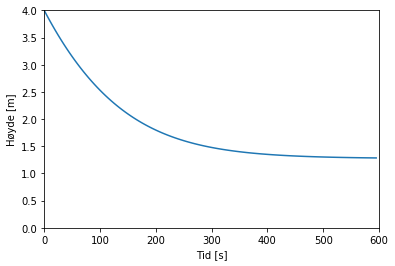

In [17]:
t = 0  # starttiden
dt = 5 # tidssteg i sekunder
h_lim = 0.01 # vi stopper beregningen når høyden er mindre enn denne
t_lim = 600 # vi stopper beregningen etter 600 sekunder
t_hist = [] # Lagerplass for historiske tidspunkter
h_hist = [] # Lagerplass for historiske h-verdier
while h > h_lim and t < t_lim:
    t_neste = t + dt
    if t > 0: # ingen beregning ved t = 0, der bruker vi initialverdier
        h = euler(h, t, t_neste)
    v = k * math.sqrt(h) # Hastigheten til væsken som strømmer ut av hullet
    q_ut = A_h * v # Mengden væske som strømmer ut av hullet
    print("t = {} => h = {} \t v = {} \t q_inn = {} \t q_ut = {}".format(t, round(h,2), round(v,2), q_inn, round(q_ut,4)))
    t_hist.append(t)
    h_hist.append(h)
    t = t_neste

import matplotlib.pyplot as plt
plt.plot(t_hist, h_hist)
plt.ylabel('Høyde [m]')
plt.xlabel('Tid [s]')
plt.axis([0, t_lim, 0, h_hist[0]])
plt.show()